# Advanced ML Part II // Lecture 01 Scratch

In [18]:
# written by John P. Cunningham, for use in lecture
# continues many of the conventions set out in Wenda Zhou's excellent tf tutorial
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

### Define helper functions

In [2]:
# evaluate performance on some data 
def perf_eval(y_pred, y_true):
    """a function to evaluate performance of predicted y values vs true class labels"""
    # now look at some data
    print(' sample pred: {0}\n sample true: {1}'.format(np.argmax(y_pred[0:20],1),np.argmax(y_true[0:20],1)))
    # avg accuracy
    is_correct_vals = np.equal(np.argmax(y_pred,1),np.argmax(y_true,1))
    accuracy_vals = np.mean(is_correct_vals)
    print(' mean classification accuracy: {0}%'.format(100*accuracy_vals))
    # Dig in a little deeper.  Where did we make correct predictions?  Does this seem reasonable?
    print(' correct predictions by class: {0}'.format(y_true[is_correct_vals,:].sum(axis=0)))

In [3]:
def plot_save(x, fname='foo.png', extent=None, show=True, cmap='gray'):
    plt.imshow(x,cmap=cmap,extent=extent)
    plt.axis('off')
    plt.savefig('tmp/'+fname,bbox_inches='tight')
    if show:
        plt.show()

### Load and sample the data

In [4]:
# get mnist data
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('../data/mnist', one_hot=True)

Extracting ../data/mnist/train-images-idx3-ubyte.gz
Extracting ../data/mnist/train-labels-idx1-ubyte.gz
Extracting ../data/mnist/t10k-images-idx3-ubyte.gz
Extracting ../data/mnist/t10k-labels-idx1-ubyte.gz


In [5]:
# take a manageable dataset size for full gradient calculation
X_train = mnist.train.images[0:5000,:]
y_train = mnist.train.labels[0:5000,:]

In [6]:
some_digit = 1
plot_save(X_train[some_digit,:].reshape(28,28), 'mnist_digit.png', show=False)

### Define a basic logistic regression model, as in Wenda's tf tutorial

In [7]:
tf.reset_default_graph()

In [8]:
# placeholders for data
x = tf.placeholder(tf.float32, shape=[None, 28*28])
y = tf.placeholder(tf.float32, shape=[None, 10]) 
# variables to be optimized
W = tf.Variable(tf.zeros([784,10]))
b = tf.Variable(tf.zeros([10]))

In [9]:
# how to predict label from data
y_model = tf.nn.softmax(tf.matmul(x,W) + b)
# the objective function
cross_ent = tf.reduce_mean(-tf.reduce_sum(y*tf.log(y_model), reduction_indices=[1]))
# the cost function to be optimized
train_step = tf.train.GradientDescentOptimizer(0.5).minimize(cross_ent)
# performance quantification
correct_pred = tf.equal(tf.argmax(y_model,1), tf.argmax(y,1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

### Instantiate a session and run the graph

In [10]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    # train model
    for i in range(1001):
        batch = mnist.train.next_batch(50)
        train_step.run(feed_dict={x: batch[0], y: batch[1]})
        # print diagnostics
        print(".", end='', flush=True)
        if i%100 == 0:
            train_error = sess.run(accuracy, {x: X_train, y: y_train})
            print("\rAfter step {0:3d}, training accuracy {1:0.4f}".format(i, train_error), flush=True)
        if i%1000 == 0: 
            test_error = sess.run(accuracy, {x:mnist.test.images, y:mnist.test.labels})
            print("\rAfter step {0:3d}, test accuracy {1:0.4f}".format(i, test_error), flush=True)

    # evaluate newly trained model on training data
    y_pred_values = sess.run(y_model, feed_dict={x: mnist.test.images})
    W_val = sess.run(W)
    b_val = sess.run(b)
    f_val = sess.run(tf.matmul(x,W) + b, feed_dict={x: X_train[some_digit,:].reshape([1,784])})


After step   0, training accuracy 0.3182
After step   0, test accuracy 0.3267
After step 100, training accuracy 0.8644............................................................
After step 200, training accuracy 0.8902............................................................
After step 300, training accuracy 0.8972............................................................
After step 400, training accuracy 0.9096............................................................
After step 500, training accuracy 0.9080............................................................
After step 600, training accuracy 0.9008............................................................
After step 700, training accuracy 0.9038............................................................
After step 800, training accuracy 0.9092............................................................
After step 900, training accuracy 0.9176............................................................
After step 10

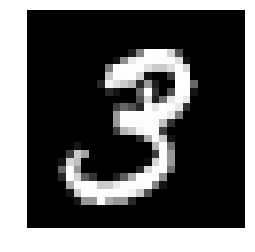

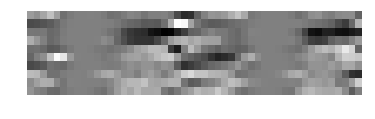

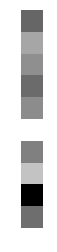

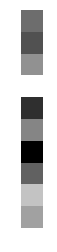

In [11]:
plot_save(X_train[some_digit,:].reshape(28,28), 'mnist_digit.png')
plot_save(W_val[300:350,:].T, 'mnist_W.png', extent=[0,80,0,20])
plot_save(b_val.reshape([10,1]), 'mnist_b.png')
plot_save(f_val.reshape([10,1]), 'mnist_f.png')

### Repeat but with two layer fc (note: not performant, just didactic)

In [12]:
tf.reset_default_graph()

In [13]:
# placeholders for data
x = tf.placeholder(tf.float32, shape=[None, 28*28])
y = tf.placeholder(tf.float32, shape=[None, 10]) 
# variables to be optimized
W1 = tf.Variable(tf.truncated_normal([784,20], stddev=0.1))
b1 = tf.Variable(tf.zeros([20]))
W2 = tf.Variable(tf.truncated_normal([20,10], stddev=0.1))
b2 = tf.Variable(tf.zeros([10]))

In [14]:
# how to predict label from data
f1 = tf.nn.softmax(tf.matmul(x,W1)+b1)
f2 = tf.matmul(f1,W2) + b2
y_model = tf.nn.softmax(f2)
# the objective function
cross_ent = tf.reduce_mean(-tf.reduce_sum(y*tf.log(y_model), reduction_indices=[1]))
# the cost function to be optimized
train_step = tf.train.GradientDescentOptimizer(0.5).minimize(cross_ent)
# performance quantification
correct_pred = tf.equal(tf.argmax(y_model,1), tf.argmax(y,1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

In [15]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    # train model
    for i in range(8001):
        batch = mnist.train.next_batch(50)
        train_step.run(feed_dict={x: batch[0], y: batch[1]})
        # print diagnostics
        #print(".", end='', flush=True)
        if i%1000 == 0:
            train_error = sess.run(accuracy, {x: X_train, y: y_train})
            print("\rAfter step {0:3d}, training accuracy {1:0.4f}".format(i, train_error), flush=True)
        if i%1000 == 0: 
            test_error = sess.run(accuracy, {x:mnist.test.images, y:mnist.test.labels})
            print("\rAfter step {0:3d}, test accuracy {1:0.4f}".format(i, test_error), flush=True)

    # evaluate newly trained model on training data
    y_pred_values = sess.run(y_model, feed_dict={x: mnist.test.images})
    W1_val = sess.run(W1)
    b1_val = sess.run(b1)
    W2_val = sess.run(W2)
    b2_val = sess.run(b2)
    f1_val = sess.run(f1,feed_dict={x: X_train[some_digit,:].reshape([1,784])})
    f2_val = sess.run(f2,feed_dict={x: X_train[some_digit,:].reshape([1,784])})   

After step   0, training accuracy 0.1058
After step   0, test accuracy 0.1004
After step 1000, training accuracy 0.4358
After step 1000, test accuracy 0.4174
After step 2000, training accuracy 0.5166
After step 2000, test accuracy 0.4971
After step 3000, training accuracy 0.5904
After step 3000, test accuracy 0.5890
After step 4000, training accuracy 0.7472
After step 4000, test accuracy 0.7381
After step 5000, training accuracy 0.7712
After step 5000, test accuracy 0.7604
After step 6000, training accuracy 0.8242
After step 6000, test accuracy 0.8174
After step 7000, training accuracy 0.8200
After step 7000, test accuracy 0.8122
After step 8000, training accuracy 0.8976
After step 8000, test accuracy 0.8925


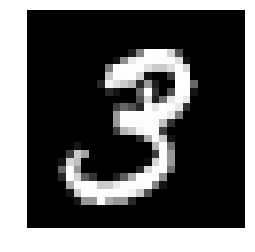

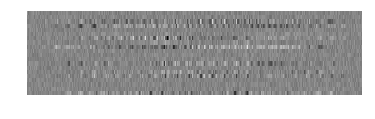

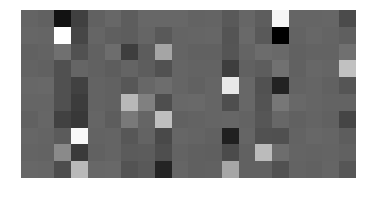

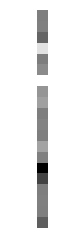

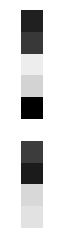

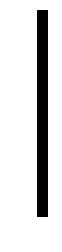

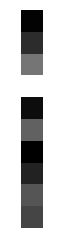

In [16]:
plot_save(X_train[some_digit,:].reshape(28,28), 'mnist_digit_post.png')
plot_save(W1_val.T, 'mnist_W1.png', extent=[0,80,0,20])
plot_save(W2_val.T, 'mnist_W2.png')
plot_save(b1_val.reshape([20,1]), 'mnist_b1.png')
plot_save(b2_val.reshape([10,1]), 'mnist_b2.png')
plot_save(f1_val.reshape([20,1]), 'mnist_f1.png')
plot_save(f2_val.reshape([10,1]), 'mnist_f2.png')

### autograd brief example (similar to the autograd readme)

In [11]:
# note: autograd is awesome.  See https://github.com/HIPS/autograd
# import wrapped numpy
import autograd.numpy as anp    
# import the grad function
from autograd import grad       

In [12]:
def normal_form(x): 
    return 1/np.sqrt(2*np.pi) * anp.exp( -1/2*(x**2))

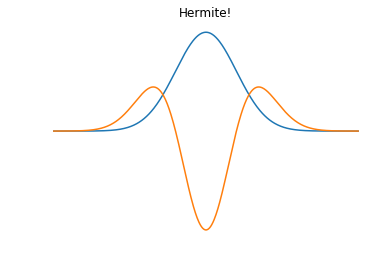

In [17]:
x = anp.linspace(-5,5,500)
plt.plot(x, normal_form(x), x, grad(grad(normal_form))(x))
         
plt.axis('off')
plt.title('Hermite!')
plt.show()

### Extra calls to create supporting figs for slides // no didactic purpose

In [9]:
perf_eval(y_pred_values, mnist.test.labels)

 sample pred: [7 2 1 0 4 1 4 9 6 9 0 6 9 0 1 5 9 7 3 4]
 sample true: [7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4]
 mean classification accuracy: 92.02%
 correct predictions by class: [  964.  1107.   912.   912.   919.   765.   912.   919.   875.   917.]


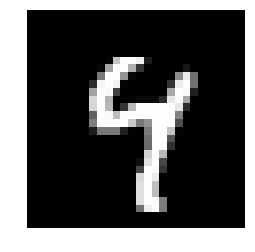

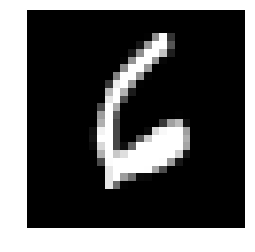

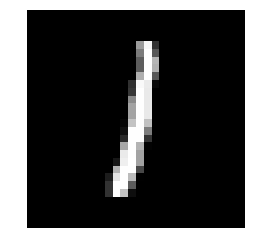

In [139]:
plot_save(X_train[some_digit+1,:].reshape(28,28), 'mnist_digit_1.png')
plot_save(X_train[some_digit+2,:].reshape(28,28), 'mnist_digit_2.png')
plot_save(X_train[some_digit+3,:].reshape(28,28), 'mnist_digit_3.png')


In [140]:
import scipy.io as sio
mat_train = sio.loadmat('../data/svhn/train_32x32.mat')
X_train = mat_train['X']
y_train = mat_train['y']

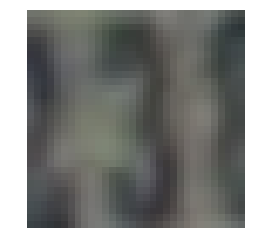

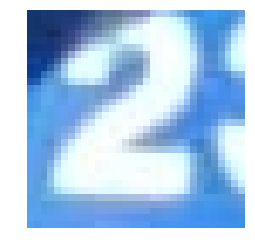

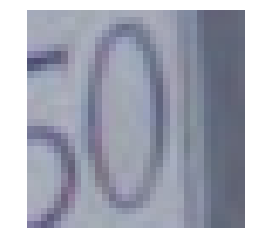

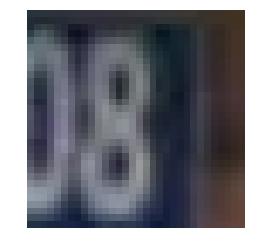

In [159]:
plot_save(X_train[:,:,:,153], 'svhn_digit_0', cmap=None)
plot_save(X_train[:,:,:,2], 'svhn_digit_1', cmap=None)
plot_save(X_train[:,:,:,5000], 'svhn_digit_2', cmap=None)
plot_save(X_train[:,:,:,341], 'svhn_digit_3', cmap=None)